Procesos de Markov

Problema 2 (Cadena de producción)

In [2]:
import numpy as np
# (a) Variables observables del problema
variables_observables = {
    "produccion": "El producto está en la estación de producción.",
    "empaque": "El producto está en la estación de empaque.",
    "mercado": "El producto ha sido enviado al mercado."
}

# (b) Conjunto de estados S = {S1, S2, S3}
estados = {
    "S1": "El producto está en la estación de producción.",
    "S2": "El producto está en la estación de empaque.",
    "S3": "El producto ha sido enviado al mercado."
}

# Imprimir las definiciones
print("Variables observables del problema:")
for key, value in variables_observables.items():
    print(f"- {key}: {value}")

print("\nConjunto de estados S = {S1, S2, S3}:")
for key, value in estados.items():
    print(f"- {key}: {value}")

# (c) Matriz de transición
P = np.array([
    [0.1, 0.0, 0.0],  # De S1
    [0.9, 0.05, 0.0], # De S2
    [0.0, 0.95, 1.0]  # De S3
])

# (d) Resolver el estado estable
# πP = π  -> (πP - πI) = 0  -> Resolver sistema lineal
# Añadimos la condición π1 + π2 + π3 = 1
A = np.transpose(P) - np.eye(3)
A = np.vstack((A, np.ones(3)))
b = np.array([0, 0, 0, 1])  # Condición adicional

# Resolver sistema lineal
pi = np.linalg.lstsq(A, b, rcond=None)[0]

# (e) Probabilidad de que ambas estaciones estén ocupadas
p_ambas_ocupadas = pi[0] + pi[1]

# (f) Probabilidad de que al menos una estación esté ocupada
p_al_menos_una = p_ambas_ocupadas

# (g) Probabilidad de que la estación de producción esté vacía
p_produccion_vacia = 1 - pi[0]

# Resultados
print("Estado estable (π):", pi)
print("Probabilidad de ambas estaciones ocupadas:", p_ambas_ocupadas)
print("Probabilidad de al menos una estación ocupada:", p_al_menos_una)
print("Probabilidad de estación de producción vacía:", p_produccion_vacia)


Variables observables del problema:
- produccion: El producto está en la estación de producción.
- empaque: El producto está en la estación de empaque.
- mercado: El producto ha sido enviado al mercado.

Conjunto de estados S = {S1, S2, S3}:
- S1: El producto está en la estación de producción.
- S2: El producto está en la estación de empaque.
- S3: El producto ha sido enviado al mercado.
Estado estable (π): [0.33333333 0.33333333 0.33333333]
Probabilidad de ambas estaciones ocupadas: 0.6666666666666669
Probabilidad de al menos una estación ocupada: 0.6666666666666669
Probabilidad de estación de producción vacía: 0.6666666666666664


Problema 3 (Cadena de producción con devolución de producto)

In [3]:
# Datos
pi = [0.0213, 0.0202, 0.9585]  # Estado estable
P_S1_inter_S2 = 0.00043       # P(S1 ∩ S2)
P_S1_union_S2 = 0.0415        # P(S1 ∪ S2)
P_not_S1 = 0.9787             # P(¬S1)

# (1) Validar que el estado estable suma 1
estado_estable_valido = sum(pi)
print(f"Validación del estado estable (suma de probabilidades): {estado_estable_valido}")

# (2) Probabilidad de que ambas estaciones estén ocupadas: P(S1 ∩ S2)
p_ambas_ocupadas = P_S1_inter_S2
print(f"Probabilidad de ambas estaciones ocupadas (P(S1 ∩ S2)): {p_ambas_ocupadas}")

# (3) Probabilidad de que al menos una estación esté ocupada: P(S1 ∪ S2)
p_al_menos_una = P_S1_union_S2
print(f"Probabilidad de al menos una estación ocupada (P(S1 ∪ S2)): {p_al_menos_una}")

# (4) Probabilidad de que la estación de producción esté vacía: P(¬S1)
p_produccion_vacia = P_not_S1
print(f"Probabilidad de que la estación de producción esté vacía (P(¬S1)): {p_produccion_vacia}")

# Verificación adicional: Probabilidad de S1 a partir de P(¬S1)
p_S1_calculada = 1 - P_not_S1
print(f"Probabilidad calculada de que la estación de producción esté ocupada (P(S1)): {p_S1_calculada}")


Validación del estado estable (suma de probabilidades): 1.0
Probabilidad de ambas estaciones ocupadas (P(S1 ∩ S2)): 0.00043
Probabilidad de al menos una estación ocupada (P(S1 ∪ S2)): 0.0415
Probabilidad de que la estación de producción esté vacía (P(¬S1)): 0.9787
Probabilidad calculada de que la estación de producción esté ocupada (P(S1)): 0.021299999999999986


Hidden Markov Models

Problema 1: Casino tramposo

Secuencia oculta más probable: ['B', 'B', 'B', 'B', 'J', 'J', 'J', 'J']
Probabilidad de la secuencia: 0.00019110297600000007

Secuencias más probables con probabilidad acumulada del 20%:
    Sequence   Probability  Cumulative Probability
0   JJJJJJJJ  1.638400e-04                0.084696
1   JJJJJJJB  7.372800e-05                0.122810
7   JJJJJBBB  2.654208e-05                0.160934
4   JJJJJBJJ  1.843200e-05                0.141020
16  JJJBJJJJ  1.843200e-05                0.177994
3   JJJJJJBB  1.474560e-05                0.131491
5   JJJJJBJB  8.294400e-06                0.145307
17  JJJBJJJB  8.294400e-06                0.182282
28  JJJBBBJJ  6.635520e-06                0.192960
15  JJJJBBBB  5.308416e-06                0.168466
12  JJJJBBJJ  3.686400e-06                0.164483
24  JJJBBJJJ  3.686400e-06                0.188477
6   JJJJJBBJ  3.686400e-06                0.147213
23  JJJBJBBB  2.985984e-06                0.186571
29  JJJBBBJB  2.985984e-06                0.1945

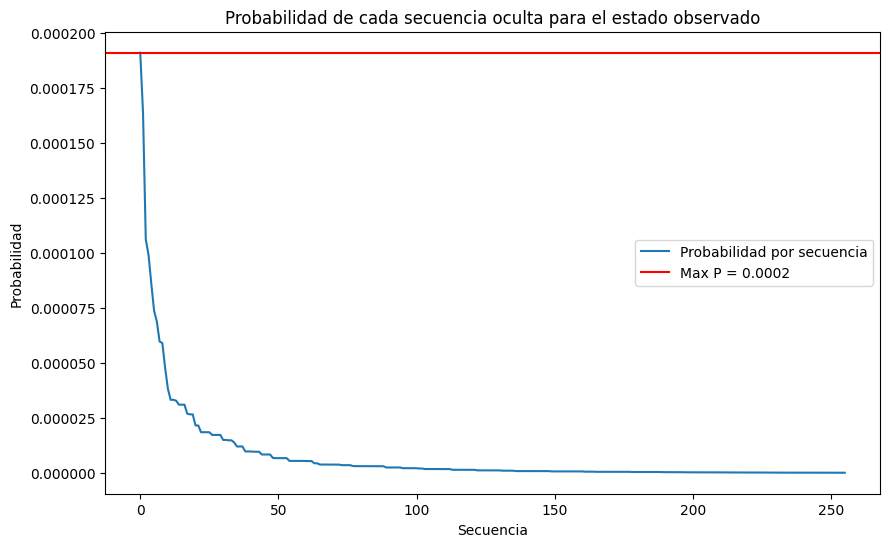

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

# (a) Distribución a priori
pi = np.array([0.2, 0.8])  # [P(J), P(B)]

# Matrices de transición (T) y emisión (E)
T = np.array([[0.8, 0.2],  # De J a J, B
              [0.2, 0.8]]) # De B a J, B
E = np.array([[0.5, 0.5],  # Emisión de C, S para J
              [0.9, 0.1]]) # Emisión de C, S para B

# Secuencia observada
omega_O = ['S', 'C', 'C', 'C', 'S', 'C', 'S', 'C']
observed_map = {'C': 0, 'S': 1}  # Mapear observables a índices
omega_O_indices = [observed_map[o] for o in omega_O]

# (b) Algoritmo de Viterbi
def viterbi(T, E, pi, omega_O_indices):
    n_states = T.shape[0]
    n_observations = len(omega_O_indices)

    # Inicialización
    delta = np.zeros((n_states, n_observations))
    psi = np.zeros((n_states, n_observations), dtype=int)

    # Paso base
    delta[:, 0] = pi * E[:, omega_O_indices[0]]

    # Recursión
    for t in range(1, n_observations):
        for j in range(n_states):
            probabilities = delta[:, t-1] * T[:, j] * E[j, omega_O_indices[t]]
            delta[j, t] = np.max(probabilities)
            psi[j, t] = np.argmax(probabilities)

    # Backtracking
    states = np.zeros(n_observations, dtype=int)
    states[-1] = np.argmax(delta[:, -1])
    for t in range(n_observations - 2, -1, -1):
        states[t] = psi[states[t+1], t+1]

    return states, np.max(delta[:, -1])

# Secuencia oculta más probable
hidden_states, max_prob = viterbi(T, E, pi, omega_O_indices)
hidden_states_map = {0: 'J', 1: 'B'}
hidden_sequence = [hidden_states_map[s] for s in hidden_states]

print("Secuencia oculta más probable:", hidden_sequence)
print("Probabilidad de la secuencia:", max_prob)

# (c) Generar todas las secuencias ocultas posibles
def calculate_sequence_probability(sequence, T, E, pi, omega_O_indices):
    prob = pi[sequence[0]] * E[sequence[0], omega_O_indices[0]]
    for t in range(1, len(sequence)):
        prob *= T[sequence[t-1], sequence[t]] * E[sequence[t], omega_O_indices[t]]
    return prob

# Todas las combinaciones de secuencias ocultas
all_hidden_sequences = list(product(range(2), repeat=len(omega_O_indices)))
sequence_probs = [
    calculate_sequence_probability(seq, T, E, pi, omega_O_indices)
    for seq in all_hidden_sequences
]

# Crear DataFrame
hidden_sequences_mapped = [
    ''.join([hidden_states_map[s] for s in seq])
    for seq in all_hidden_sequences
]
df = pd.DataFrame({
    'Sequence': hidden_sequences_mapped,
    'Probability': sequence_probs
})
df['Cumulative Probability'] = df['Probability'].cumsum() / sum(sequence_probs)
df = df.sort_values(by='Probability', ascending=False)

# Filtrar por probabilidad acumulada del 20%
df_20_percent = df[df['Cumulative Probability'] <= 0.2]

print("\nSecuencias más probables con probabilidad acumulada del 20%:")
print(df_20_percent)

# (d) Dibujar las probabilidades ocultas
plt.figure(figsize=(10, 6))
plt.plot(range(len(sequence_probs)), sorted(sequence_probs, reverse=True), label="Probabilidad por secuencia")
plt.axhline(y=max_prob, color='r', linestyle='-', label=f"Max P = {max_prob:.4f}")
plt.legend()
plt.xlabel("Secuencia")
plt.ylabel("Probabilidad")
plt.title("Probabilidad de cada secuencia oculta para el estado observado")
plt.show()


In [8]:
#Para el ejercicio H
import numpy as np
from hmmlearn import hmm

# Parámetros originales
pi_original = np.array([0.2, 0.8])  # Probabilidad inicial
T_original = np.array([[0.8, 0.2], [0.2, 0.8]])  # Matriz de transición
E_original = np.array([[0.5, 0.5], [0.9, 0.1]])  # Matriz de emisión

# Mapear estados observables
observables = ['C', 'S']
observable_map = {0: 'C', 1: 'S'}

# Generar datos sintéticos
def generate_sequences(T, E, pi, n_sequences, sequence_length):
    n_states = T.shape[0]
    n_observables = E.shape[1]

    hidden_sequences = []
    observable_sequences = []

    for _ in range(n_sequences):
        hidden_seq = []
        observable_seq = []

        # Estado inicial
        current_state = np.random.choice(n_states, p=pi)

        for _ in range(sequence_length):
            # Generar el observable
            observable = np.random.choice(n_observables, p=E[current_state])
            observable_seq.append(observable)

            # Guardar el estado oculto
            hidden_seq.append(current_state)

            # Transitar al siguiente estado
            current_state = np.random.choice(n_states, p=T[current_state])

        hidden_sequences.append(hidden_seq)
        observable_sequences.append(observable_seq)

    return np.array(hidden_sequences), np.array(observable_sequences)

# Generar 100 secuencias sintéticas de 20 observaciones cada una
n_sequences = 100
sequence_length = 20
hidden_sequences, observable_sequences = generate_sequences(
    T_original, E_original, pi_original, n_sequences, sequence_length
)

# Preparar observables para entrenamiento (codificados como índices)
observables_encoded = observable_sequences.flatten()

# Entrenar el modelo HMM usando Baum-Welch
model = hmm.MultinomialHMM(n_components=2, n_iter=100, tol=1e-4, random_state=42)
model.startprob_ = pi_original  # Iniciar con la probabilidad a priori conocida
model.fit(observables_encoded.reshape(-1, 1))

# Matrices estimadas
T_estimated = model.transmat_
E_estimated = model.emissionprob_
pi_estimated = model.startprob_

# Resultados
print("Matriz de transición original:")
print(T_original)
print("\nMatriz de transición estimada:")
print(T_estimated)

print("\nMatriz de emisión original:")
print(E_original)
print("\nMatriz de emisión estimada:")
print(E_estimated)

print("\nProbabilidades iniciales originales:")
print(pi_original)
print("\nProbabilidades iniciales estimadas:")
print(pi_estimated)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'


Matriz de transición original:
[[0.8 0.2]
 [0.2 0.8]]

Matriz de transición estimada:
[[0.87827377 0.12172623]
 [0.99887354 0.00112646]]

Matriz de emisión original:
[[0.5 0.5]
 [0.9 0.1]]

Matriz de emisión estimada:
[[1.]
 [1.]]

Probabilidades iniciales originales:
[0.2 0.8]

Probabilidades iniciales estimadas:
[0.17550431 0.82449569]


Ejercicios estimación de parámetros

Problema 9: Estimación de la temperatura de un gas diatómico

Advertencia: Hay valores nulos o no numéricos en los datos. Eliminando filas con NaN.
Los datos de velocidad son válidos.


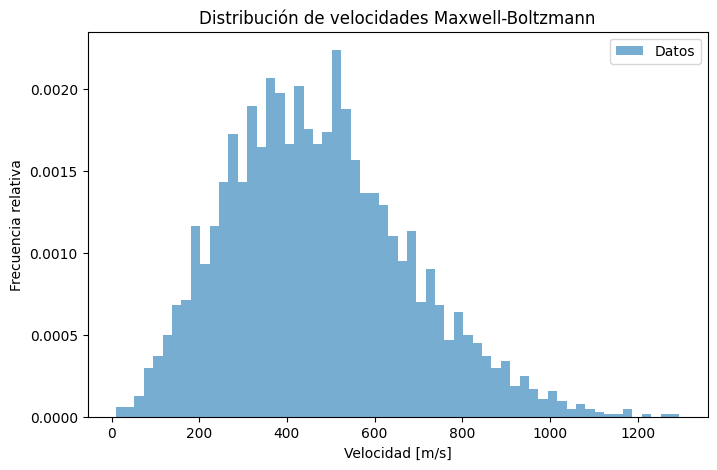

(c) Promedio empírico de velocidad: 472.18 m/s
(e) Mejor estimación de la temperatura: T = 300.00 K


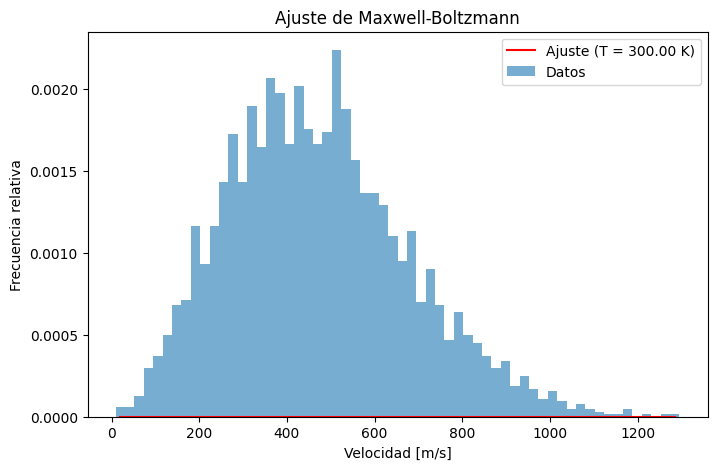

(f) Velocidad más probable: 422.10 m/s
(g) Velocidad promedio: 476.29 m/s
Diferencia relativa entre promedio empírico y calculado: 0.87%
(h) Velocidad cuadrática media: 516.96 m/s


C:\Users\dnico\AppData\Local\Temp\ipykernel_11688\3534618835.py:101: RuntimeWarning: invalid value encountered in scalar divide
  acceptance_ratio = posterior(proposed_T, velocities) / posterior(current_T, velocities)


(i) Temperatura estimada (posterior): 300.00 ± 0.00 K


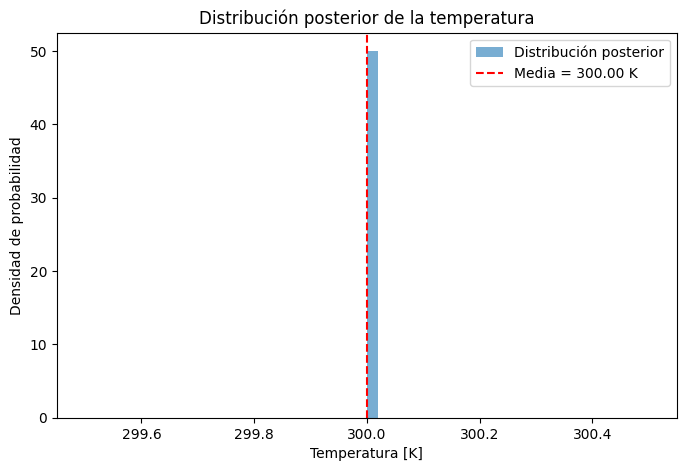

(j) Intervalo de confianza del 95% para T: 300.00 K - 300.00 K
Temperaturas superiores a 305.6 K están excluidas.


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.constants import R

# (a) Descargar los datos
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Maxwell.csv"
data = pd.read_csv(url, header=None)

# Intentar convertir los datos a tipo numérico
data[0] = pd.to_numeric(data[0], errors='coerce')

# Verificar si hay valores nulos o NaN
if data[0].isnull().any():
    print(f"Advertencia: Hay valores nulos o no numéricos en los datos. Eliminando filas con NaN.")
    data = data.dropna()  # Eliminar filas con valores NaN

# Verificar nuevamente los datos
velocities = data[0].values

# Verificar que los datos sean numéricos
if np.any(np.isnan(velocities)) or np.any(np.isinf(velocities)):
    raise ValueError("Los datos contienen valores no numéricos o infinitos.")
else:
    print("Los datos de velocidad son válidos.")

# Constantes del problema
M = 0.028  # Masa molar del nitrógeno en kg/mol
kB = 8.31  # Constante de Boltzmann (J/K)
mass = M / 6.022e23  # Masa por molécula en kg (masa molar / número de Avogadro)

# (b) Construir el histograma
n_bins = 60
hist, bin_edges = np.histogram(velocities, bins=n_bins, density=True)

# Validar el histograma
if len(hist) == 0:
    raise ValueError("El histograma no se pudo generar correctamente. Revise los datos de entrada.")
    
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Graficar el histograma
plt.figure(figsize=(8, 5))
plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0], alpha=0.6, label="Datos")
plt.xlabel("Velocidad [m/s]")
plt.ylabel("Frecuencia relativa")
plt.title("Distribución de velocidades Maxwell-Boltzmann")
plt.legend()
plt.show()

# (c) Calcular el promedio empírico
empirical_mean = np.mean(velocities)
print(f"(c) Promedio empírico de velocidad: {empirical_mean:.2f} m/s")

# (d) Definir la función de Likelihood
def maxwell_boltzmann(v, T):
    factor = (mass / (2 * np.pi * kB * T)) ** 1.5
    return 4 * np.pi * v**2 * factor * np.exp(-mass * v**2 / (2 * kB * T))

# (e) Ajustar los datos con la función de Maxwell-Boltzmann
popt, pcov = curve_fit(lambda v, T: maxwell_boltzmann(v, T), bin_centers, hist, p0=[300])
optimal_T = popt[0]
print(f"(e) Mejor estimación de la temperatura: T = {optimal_T:.2f} K")

# Graficar el ajuste
plt.figure(figsize=(8, 5))
plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0], alpha=0.6, label="Datos")
plt.plot(bin_centers, maxwell_boltzmann(bin_centers, optimal_T), 'r-', label=f"Ajuste (T = {optimal_T:.2f} K)")
plt.xlabel("Velocidad [m/s]")
plt.ylabel("Frecuencia relativa")
plt.title("Ajuste de Maxwell-Boltzmann")
plt.legend()
plt.show()

# (f) Calcular la velocidad más probable
v_p = np.sqrt(2 * R * optimal_T / M)
print(f"(f) Velocidad más probable: {v_p:.2f} m/s")

# (g) Calcular la velocidad promedio
v_m = (2 / np.sqrt(np.pi)) * v_p
print(f"(g) Velocidad promedio: {v_m:.2f} m/s")
print(f"Diferencia relativa entre promedio empírico y calculado: {abs(v_m - empirical_mean) / empirical_mean:.2%}")

# (h) Calcular la velocidad cuadrática media
v_rms = np.sqrt(3 * R * optimal_T / M)
print(f"(h) Velocidad cuadrática media: {v_rms:.2f} m/s")

# (i) Algoritmo de Metropolis-Hastings para la distribución posterior
def posterior(T, velocities):
    likelihood = np.prod(maxwell_boltzmann(velocities, T))
    prior = 1 if 200 <= T <= 400 else 0  # Prior uniforme entre 200 K y 400 K
    return likelihood * prior

n_iter = 10000
T_samples = []
current_T = 300

for _ in range(n_iter):
    proposed_T = np.random.normal(current_T, 5)
    acceptance_ratio = posterior(proposed_T, velocities) / posterior(current_T, velocities)
    if np.random.rand() < acceptance_ratio:
        current_T = proposed_T
    T_samples.append(current_T)

T_samples = np.array(T_samples)
mean_T = np.mean(T_samples)
std_T = np.std(T_samples)
print(f"(i) Temperatura estimada (posterior): {mean_T:.2f} ± {std_T:.2f} K")

# Graficar distribución posterior
plt.figure(figsize=(8, 5))
plt.hist(T_samples, bins=50, density=True, alpha=0.6, label="Distribución posterior")
plt.axvline(mean_T, color="red", linestyle="--", label=f"Media = {mean_T:.2f} K")
plt.xlabel("Temperatura [K]")
plt.ylabel("Densidad de probabilidad")
plt.title("Distribución posterior de la temperatura")
plt.legend()
plt.show()

# (j) Intervalo de confianza del 95% y exclusión de hipótesis
conf_interval = np.percentile(T_samples, [2.5, 97.5])
print(f"(j) Intervalo de confianza del 95% para T: {conf_interval[0]:.2f} K - {conf_interval[1]:.2f} K")
if conf_interval[1] < 305.6:
    print(f"Temperaturas superiores a 305.6 K están excluidas.")
else:
    print(f"Temperaturas superiores a 305.6 K no están excluidas.")


Problema 10: Higgs boson discovery

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Paso 1: Cargar los datos desde el archivo CSV
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/HiggsFitting.csv"
data = pd.read_csv(url)

# Paso 2: Identificar y limpiar las columnas
print("Columnas disponibles:", data.columns)

# Asumimos que las columnas relevantes son "M" y "Signal+Background"
mass_column = "M"
signal_column = "Signal+Background"

if mass_column in data.columns and signal_column in data.columns:
    mass = pd.to_numeric(data[mass_column], errors='coerce')  # Convertir a numérico
    signal = pd.to_numeric(data[signal_column], errors='coerce')  # Convertir a numérico

    # Filtrar valores nulos
    data_cleaned = data.dropna(subset=[mass_column, signal_column])
    mass = data_cleaned[mass_column]
    signal = data_cleaned[signal_column]
else:
    raise NameError(f"Las columnas '{mass_column}' o '{signal_column}' no existen en el archivo.")

# Paso 3: Crear el histograma ponderado
bins = np.linspace(100, 160, 30)  # Definir los bordes de los bins
H, edges = np.histogram(mass, bins=bins, weights=signal)
bin_centers = 0.5 * (edges[1:] + edges[:-1])  # Calcular los centros de los bins

# Paso 4: Graficar el histograma con barras de error
plt.errorbar(
    bin_centers, H, yerr=np.sqrt(H), fmt='o', ecolor='k', capsize=5, label="Datos"
)
plt.title("Distribución de Masa Invariante")
plt.xlabel("Masa invariante [GeV]")
plt.ylabel("Frecuencia (a.u.)")
plt.legend()
plt.grid()
plt.show()

# Paso 5: Definir la función de ajuste (modelo de Gaussiana)
def gaussian(x, A, mu, sigma, B):
    """
    Modelo de ajuste: Gaussiana con un término lineal.
    """
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2) + B

# Paso 6: Ajustar la curva a los datos
p0 = [max(H), 125, 5, min(H)]  # Valores iniciales: amplitud, media, sigma, offset
params, covariance = curve_fit(gaussian, bin_centers, H, p0=p0)

# Extraer parámetros ajustados
A_fit, mu_fit, sigma_fit, B_fit = params
print(f"Parámetros ajustados: A={A_fit:.2f}, mu={mu_fit:.2f}, sigma={sigma_fit:.2f}, B={B_fit:.2f}")

# Paso 7: Graficar el ajuste junto al histograma
x_fit = np.linspace(100, 160, 500)  # Puntos para la curva ajustada
y_fit = gaussian(x_fit, A_fit, mu_fit, sigma_fit, B_fit)

plt.errorbar(
    bin_centers, H, yerr=np.sqrt(H), fmt='o', ecolor='k', capsize=5, label="Datos"
)
plt.plot(x_fit, y_fit, 'r-', label="Ajuste Gaussiano")
plt.title("Ajuste Gaussiano a la Distribución de Masa")
plt.xlabel("Masa invariante [GeV]")
plt.ylabel("Frecuencia (a.u.)")
plt.legend()
plt.grid()
plt.show()

# Paso 8: Analizar la significancia de los parámetros
print("Resultados del ajuste:")
print(f"Amplitud (A): {A_fit:.2f}")
print(f"Media (mu): {mu_fit:.2f} GeV")
print(f"Desviación estándar (sigma): {sigma_fit:.2f} GeV")
print(f"Offset (B): {B_fit:.2f}")

# Paso 9: Calcular la incertidumbre de los parámetros
param_errors = np.sqrt(np.diag(covariance))
print("\nIncertidumbres de los parámetros:")
print(f"Error en A: {param_errors[0]:.2f}")
print(f"Error en mu: {param_errors[1]:.2f}")
print(f"Error en sigma: {param_errors[2]:.2f}")
print(f"Error en B: {param_errors[3]:.2f}")

# Paso 10: Interpretar los resultados
print("\nInterpretación:")
print(f"La masa del bosón se estima en {mu_fit:.2f} ± {param_errors[1]:.2f} GeV,")
print(f"con una desviación estándar de {sigma_fit:.2f} ± {param_errors[2]:.2f} GeV.")


Ejercicios: Hypothesis testing

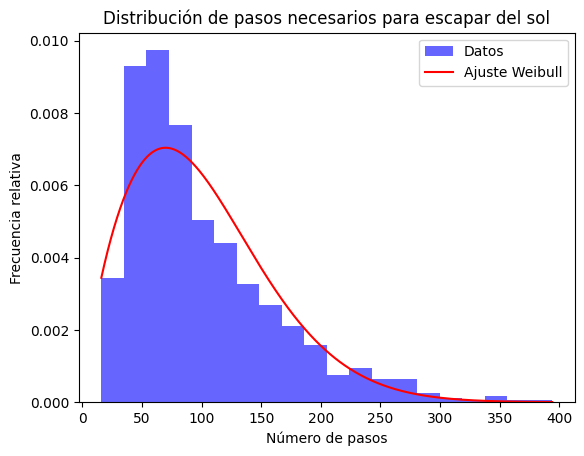

Valor esperado del número de pasos: 99.8215
Parámetros de Weibull: (1, np.float64(1.7556784200330586), 0, np.float64(112.84396785097826))
Tiempo medio estimado de escape del fotón: 862620.17 años


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import exponweib

# Parámetros
R_s = 1  # Radio del sol (en unidades arbitrarias)
l = 0.1  # Camino libre medio (en unidades arbitrarias)
N_fotones = 1000  # Número de fotones simulados
n_clases = 20  # Número de clases para el histograma

def generar_caminata_3D(R_s, l):
    """Genera una caminata aleatoria en 3D para un fotón y retorna el número de pasos hasta escapar."""
    x, y, z = 0, 0, 0
    pasos = 0

    while np.sqrt(x**2 + y**2 + z**2) <= R_s:
        theta = np.random.uniform(0, np.pi)
        phi = np.random.uniform(0, 2 * np.pi)
        x += l * np.sin(theta) * np.cos(phi)
        y += l * np.sin(theta) * np.sin(phi)
        z += l * np.cos(theta)
        pasos += 1

    return pasos

# Generar caminatas para N fotones y contar el número de pasos para escapar
pasos_totales = [generar_caminata_3D(R_s, l) for _ in range(N_fotones)]

# Histograma de pasos
hist, bins = np.histogram(pasos_totales, bins=n_clases, density=True)
m_clases = (bins[:-1] + bins[1:]) / 2  # Marca de clase

# Calcular el valor esperado del número de pasos
valor_esperado = np.sum(hist * m_clases * np.diff(bins))

# Ajuste de Weibull
params = exponweib.fit(pasos_totales, floc=0, f0=1)

# Graficar histograma y ajuste
x_fit = np.linspace(min(pasos_totales), max(pasos_totales), 1000)
y_fit = exponweib.pdf(x_fit, *params)

plt.hist(pasos_totales, bins=n_clases, density=True, alpha=0.6, color='blue', label='Datos')
plt.plot(x_fit, y_fit, 'r-', label='Ajuste Weibull')
plt.xlabel('Número de pasos')
plt.ylabel('Frecuencia relativa')
plt.title('Distribución de pasos necesarios para escapar del sol')
plt.legend()
plt.show()

print(f"Valor esperado del número de pasos: {valor_esperado}")
print(f"Parámetros de Weibull: {params}")

# Cálculo del tiempo medio de escape (parte realista)
# Parámetros físicos
R_s_km = 7e5  # Radio del sol en km
l_km = 6e-8   # Camino libre medio en km (0.6 cm)
c = 3e5       # Velocidad de la luz en km/s

# Tiempo medio de escape
T_segundos = (R_s_km**2) / (l_km * c)
T_años = T_segundos / (60 * 60 * 24 * 365.25)  # Convertir segundos a años

print(f"Tiempo medio estimado de escape del fotón: {T_años:.2f} años")
